<a href="https://colab.research.google.com/github/khyatiraka/machineLearningKhyati/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split



In [57]:
#read csv and gain information about it
df = pd.read_csv("/content/Salary_dataset.csv")
df.describe(include='all')
#df.corr(numeric_only = True)


,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [52]:
#split dataset
X_original = df["YearsExperience"]
y_original = df["Salary"]/1000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
#print(y_train)
#print(X_train)


X_train shape: (24,)
X_test shape: (6,)
y_train shape: (24,)
y_test shape: (6,)


In [58]:
#write functions
#setting random values for w and b
w = 1
b = 40


def y_predict(X,w,b):
  m = X.shape[0]  #getting the number of training examples
  y_hat = np.zeros(m) #creating an array for y (the number of inputs will equal the number of outputs)

  for i in range(m):
    y_hat[i] = w * X[i] + b
  return y_hat

def costFunction(X,Y,w,b):
  m = X.shape[0]
  predictedValues = y_predict(X,w,b)
  SE_sum = np.sum((predictedValues - Y)**2)
  MSE = SE_sum / (2. * m)
  return MSE


costFunction(X_train.values,y_train.values,w,b)





726.2924251875

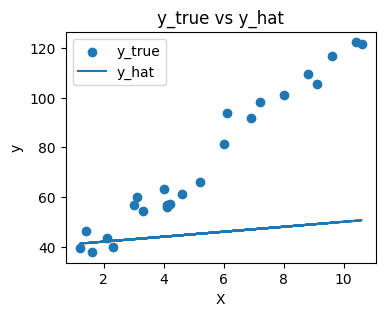

In [59]:
#plot
def plot_true_vs_preds(X, y, w, b):
    y_hat = y_predict(X, w, b)
    #print(y)
    #print(y_hat)
    plt.figure(figsize=(4,3))
    plt.scatter(X, y, label='y_true')
    plt.plot(X, y_hat, label='y_hat')
    plt.title('y_true vs y_hat')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
plot_true_vs_preds(X_train.values,y_train.values,w,b)

In [60]:
#gradient descent
#calculating the derivatives
def gradient(X,Y,w,b):
  m = X.shape[0]
  dj_dw=0
  dj_db=0
  for i in range(m):
    err = w*X[i] + b-Y[i]
    dj_dw+= err*X[i]
    dj_db+=err
  dj_dw /= m
  dj_db /= m
  return dj_dw,dj_db





In [65]:
#implementing one step of gradient descent
def gradient_descent(X,Y,w,b,n_iter=10000,alpha=.01,hist_iter=100):
  m = X.shape[0]
  history = {}
  for i in range(n_iter):
    dw, db = gradient(X, Y, w, b)
    w = w - alpha*dw
    b = b - alpha*db
    if i%hist_iter == 0: #calculate cost function after 100
      cost = costFunction(X, Y, w, b)
      history[i] = cost
      #print(f"Iter\t{i}\tCost\t{cost}")
  return w,b,history




w,b,history = gradient_descent(X_train.values,y_train.values,w,b)


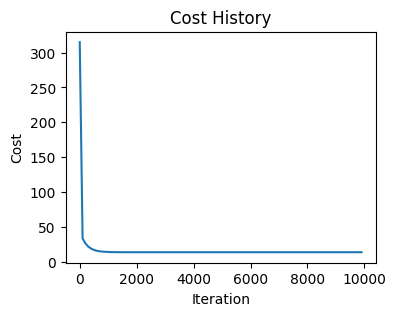

In [66]:
def plot_history(history):
    plt.figure(figsize=(4,3))
    plt.plot(history.keys(), history.values())
    plt.title('Cost History')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()
plot_history(history)

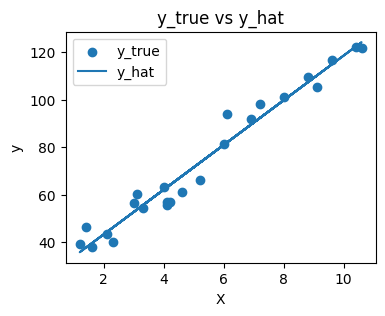

In [67]:
plot_true_vs_preds(X_train.values,y_train.values,w,b)

In [71]:
#final equation
def salaryPredictor(experience):
  print(f"y={w}x+{b}")
  return w*(experience) + b
salaryPredictor(10)

y=9.423815322595821x+24.380201482439322


118.61835470839753